In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import funciones as fc



#### Cargamos el dataset y empezamoso con un pequeño analisis

In [496]:
df = pd.read_csv ('data/transaction_dataset.csv')

In [497]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [498]:
df.head (5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [499]:
# Elimando las dos primeras columnas que no aportan nada. Unnamed e Index

df = df.iloc [:,2:]

In [500]:
df

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0

In [501]:
fc.describe_df (df)

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
DATA_TYPE,object,int64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,27.405751,8.850727
UNIQUE_VALUES,9816,2,5013,6223,7810,641,727,20,256,258,4589,6302,6767,4719,6647,5854,3,4,4,897,5868,6728,4,5717,300,3460,1415,29,107,147,4,123,1,1,1,1,1276,2647,3380,476,1130,1309,1,1,1,70,121,304,466
CARDIN (%),99.75,0.02,50.94,63.24,79.36,6.51,7.39,0.2,2.6,2.62,46.63,64.04,68.76,47.95,67.54,59.49,0.03,0.04,0.04,9.11,59.63,68.37,0.04,58.09,3.05,35.16,14.38,0.29,1.09,1.49,0.04,1.25,0.01,0.01,0.01,0.01,12.97,26.9,34.35,4.84,11.48,13.3,0.01,0.01,0.01,0.71,1.23,3.09,4.74


In [502]:
# Evitar los espacios para poder seleccionar bien los nombres de las columnas.
df.columns = df.columns.str.strip()

# EMPEZAMOS CON LAS VARIABLES CATEGORICAS QUE SON MENOS:

###  ANALISIS DE VARIABLES CATEGORICAS:

- Tenemos 3 variables categoricas:

>>> Address

>>> ERC20 most sent token type

>>> ERC20_most_rec_token_type



# Direcciones o Address:

- Tenemos direcciones que se estan repitiendo. por lo que vamos a indagar un poco mas sobre los datos que tienen cada una.
- Veremos si se deben eliminar algunas de ellas debido a que contienen informacion rebundate

In [503]:
address_counts = df ['Address'].value_counts ()
address_counts

Address
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: count, Length: 9816, dtype: int64

In [504]:
addresses_to_keep = address_counts[address_counts > 1].index

df_fil = pd.DataFrame (addresses_to_keep)

print (len (df_fil))

25


In [505]:
address_counts = df['Address'].value_counts()

# Filtrar las direcciones que se repiten
repeated_addresses = address_counts[address_counts > 1].index

repeated_addresses

Index(['0x4cd526aa2db72eb1fd557b37c6b0394acd35b212',
       '0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f',
       '0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1',
       '0x4c24af967901ec87a6644eb1ef42b680f58e67f5',
       '0x4c268c7b1d51b369153d6f1f28c61b15f0e17746',
       '0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20',
       '0x4c271764eadcf0d07e5a937b2de290294c9d11c2',
       '0x4c27438a77738153f6cf3ed890b2817d52ebf584',
       '0x4c391cc032c9107b596267610a05262c90fc2df7',
       '0x4c4a03e100b4b104355edc4c50ce12b9a2879547',
       '0x4c4da560350e302232a184c8fa16b126a772c326',
       '0x4c5b0709f66719861e7277c9dcda9175deb3d866',
       '0x4c7520df888aa4569a37ac7d132f89c65821f0af',
       '0x4c77f6b01da78d053d5885e43bce5239b623dd3e',
       '0x4c7accc2689708892be29256fbe9d45a92f0aa97',
       '0x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b',
       '0x4c97ccdaa61ca167e8a3b4d425ae6fbf16bcb39c',
       '0x4cad652b71519a7a68d05dada31122c4c9a5ed95',
       '0x4cb6f8f060365dd2e4eb949609dd6293bb95

In [506]:
len(df['Address'].unique())

9816

In [507]:
df_filtrado = df[df['Address'].str.contains('0x4cd526aa2db72eb1fd557b37c6b0394acd35b212', case=False, na=False)]

In [508]:
pd.set_option('display.max_columns', None) 
df_filtrado

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2931,0x4cd526aa2db72eb1fd557b37c6b0394acd35b212,0,3.38,0.0,20.25,6,1,0,1,2,101.0,101.0,101.0,9.999454,50.999454,16.832787,0.0,0.0,0.0,7,100.996724,101.0,0.0,0.003276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2956,0x4cd526aa2db72eb1fd557b37c6b0394acd35b212,0,3.38,0.0,20.25,6,1,0,1,2,101.0,101.0,101.0,9.999454,50.999454,16.832787,0.0,0.0,0.0,7,100.996724,101.0,0.0,0.003276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [509]:
df = df.drop_duplicates(subset=['Address'], keep='first')

In [510]:
len(df['Address'])

9816

### Variables categoricas ERC20 Tokens

> Como hemos visto en las celdas anteriores:

>>> ERC20 most sent token type y ERC20_most_rec_token_type: Tienen baja cardinalidad y gran cantidad de missings.

>>> Ademas contienen 0 por lo que vamos a cambiarlos a null debido a que 0 no tiene sentido ninguno

In [511]:
categor = df.select_dtypes('O').columns.astype('category')

df[categor]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [512]:
for i in df [categor].columns:
    print (f'La columna categórica: {i}, tiene: {len (df [i].value_counts ())} de valores únicos')

La columna categórica: Address, tiene: 9816 de valores únicos
La columna categórica: ERC20 most sent token type, tiene: 304 de valores únicos
La columna categórica: ERC20_most_rec_token_type, tiene: 466 de valores únicos


In [513]:
df ['ERC20 most sent token type'].value_counts ()

# tenemos una alta cantidad de nulos : 

ERC20 most sent token type
0                                                         4388
                                                          1191
EOS                                                        138
OmiseGO                                                    136
Golem                                                      129
                                                          ... 
BlockchainPoland                                             1
Covalent Token                                               1
Nebula AI Token                                              1
Blocktix                                                     1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 304, dtype: int64

In [514]:
df ['ERC20_most_rec_token_type'].value_counts ()

ERC20_most_rec_token_type
0                        4388
OmiseGO                   869
Blockwell say NOTSAFU     779
DATAcoin                  357
Livepeer Token            204
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

In [515]:
df ['ERC20 most sent token type'].replace ({'0': np.NaN}, inplace = True)
df ['ERC20_most_rec_token_type'].replace ({'0': np.NaN}, inplace = True)

C:\Users\pobla\AppData\Local\Temp\ipykernel_11096\1238701465.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pobla\AppData\Local\Temp\ipykernel_11096\1238701465.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [516]:
fc.describe_df (df)

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
DATA_TYPE,object,int64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,8.445395,72.096577,53.575795
UNIQUE_VALUES,9816,2,5013,6223,7810,641,727,20,256,258,4589,6302,6767,4719,6647,5854,3,4,4,897,5868,6728,4,5717,300,3460,1415,29,107,147,4,123,1,1,1,1,1276,2647,3380,476,1130,1309,1,1,1,70,121,303,465
CARDIN (%),100.0,0.02,51.07,63.4,79.56,6.53,7.41,0.2,2.61,2.63,46.75,64.2,68.94,48.07,67.72,59.64,0.03,0.04,0.04,9.14,59.78,68.54,0.04,58.24,3.06,35.25,14.42,0.3,1.09,1.5,0.04,1.25,0.01,0.01,0.01,0.01,13.0,26.97,34.43,4.85,11.51,13.34,0.01,0.01,0.01,0.71,1.23,3.09,4.74


Debido a la alta cantidad de nulos:
>> ERC20 most sent token type: 72%

>> ERC20_most_rec_token_type: 54%

Decido no incluir estas features dentro de mi modelo, aunque me parecen que son features muy importantes si estuvieran completas.

In [517]:
df = df.drop(['ERC20 most sent token type', 'ERC20_most_rec_token_type'], axis=1)

# Selección de features numéricas:

>> Las siguientes celdas muestran la distribución de features que no nos interesan para nuestro modelo.

In [518]:
# Conociendo los valores unicos de cada columna.

for col in df: print (f' {col} : {len (df [col].unique ())}')

 Address : 9816
 FLAG : 2
 Avg min between sent tnx : 5013
 Avg min between received tnx : 6223
 Time Diff between first and last (Mins) : 7810
 Sent tnx : 641
 Received Tnx : 727
 Number of Created Contracts : 20
 Unique Received From Addresses : 256
 Unique Sent To Addresses : 258
 min value received : 4589
 max value received : 6302
 avg val received : 6767
 min val sent : 4719
 max val sent : 6647
 avg val sent : 5854
 min value sent to contract : 3
 max val sent to contract : 4
 avg value sent to contract : 4
 total transactions (including tnx to create contract : 897
 total Ether sent : 5868
 total ether received : 6728
 total ether sent contracts : 4
 total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time betwee

In [519]:
unique_counts = df.nunique()


columns_to_keep = unique_counts[unique_counts < 10].index


columns_list = list(columns_to_keep)

columns_list

['FLAG',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total ether sent contracts',
 'ERC20 uniq sent addr.1',
 'ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract']

In [520]:
target_column = 'FLAG'

# Recorrer todas las columnas excluyendo la columna de destino
for col in df.columns:
    if col != target_column and len(df[col].value_counts()) < 10:
        print(f'La columna {col} tiene la siguiente distribución: \n{df[col].value_counts()}')
        print('------------')

La columna min value sent to contract tiene la siguiente distribución: 
min value sent to contract
0.00    9814
0.02       1
0.01       1
Name: count, dtype: int64
------------
La columna max val sent to contract tiene la siguiente distribución: 
max val sent to contract
0.000000    9813
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64
------------
La columna avg value sent to contract tiene la siguiente distribución: 
avg value sent to contract
0.000000    9813
0.020000       1
0.010000       1
0.023014       1
Name: count, dtype: int64
------------
La columna total ether sent contracts tiene la siguiente distribución: 
total ether sent contracts
0.000000    9813
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64
------------
La columna ERC20 uniq sent addr.1 tiene la siguiente distribución: 
ERC20 uniq sent addr.1
0.0    8959
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64
------------
La columna ERC20 avg time betwe

In [521]:
columns_to_drop = [col for col in df.columns if col != target_column and df[col].nunique() < 10]

columns_to_drop

['min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total ether sent contracts',
 'ERC20 uniq sent addr.1',
 'ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract']

In [522]:
target_column = 'target'

# Eliminar las columnas filtradas del DataFrame
df = df.drop(columns=columns_to_drop)


print("DataFrame después de eliminar columnas con menos de 10 valores únicos:")
df

DataFrame después de eliminar columnas con menos de 10 valores únicos:


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,34,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Ahora que hemos eliminado algunas features / columnas debido a su distribución nos vamos a centrar en otro punto importante como es la varianza:

In [523]:
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9816.000000,9816.000000,9816.000000,9.816000e+03,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9.816000e+03,9.816000e+03,9.816000e+03,8987.000000,8.987000e+03,8.987000e+03,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8987.000000,8987.000000
mean,0.221985,5079.449775,7999.484930,2.181872e+05,116.148024,164.034332,3.739099,30.424104,25.885086,43.815895,524.036695,100.702932,4.809714,314.601343,44.631948,283.921455,1.018513e+04,1.166624e+04,1.481105e+03,36.313675,1.299801e+08,1.390455e+07,111.247817,5.650606,7.604985,4.897185,486.896950,1.256001e+08,4.358265e+06,1.177390e+04,1.307023e+07,6.335943e+06,1.382107,4.822188
std,0.415602,21485.935325,23074.485991,3.228664e+05,758.155374,942.004171,141.625485,298.998043,264.151587,326.252165,13025.351910,2888.642723,138.785921,6637.566787,239.187359,1354.058518,3.587784e+05,3.646679e+05,2.427340e+05,448.139029,1.055323e+10,1.182031e+09,6137.151489,105.398337,81.929074,17.244581,16906.729265,1.055205e+10,2.144168e+08,1.055031e+06,1.181545e+09,5.922985e+08,6.722984,16.676068
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.170200e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424673,0.000000,0.163902,0.086103,4.000000,2.259862e-01,2.668812e+00,6.200000e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.335000,509.255000,4.656981e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095053,6.000000,1.727367,0.049209,4.999380,1.605512,8.000000,1.246589e+01,3.049397e+01,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,561.037500,5480.845000,3.035992e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.995778,22.000000,0.998800,61.406769,21.999380,54.000000,1.009990e+02,1.010000e+02,4.452000e-02,3.000000,1.000089e+02,0.000000e+00,0.000000,0.000000,2.000000,2.000000,0.004388,9.900000e+01,2.849149e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07,10001.000000,1.000020e+12,1.120000e+11,416000.000000,6582.000000,4293.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


- En la siguiente celda podemos observar que no tenemos ningunga features con varianza 0 por lo que no es necesario eliminar mas columnas.

In [524]:
df[numericals].var()

FLAG                                                    1.727250e-01
Avg min between sent tnx                                4.616454e+08
Avg min between received tnx                            5.324319e+08
Time Diff between first and last (Mins)                 1.042427e+11
Sent tnx                                                5.747996e+05
Received Tnx                                            8.873719e+05
Number of Created Contracts                             2.005778e+04
Unique Received From Addresses                          8.939983e+04
Unique Sent To Addresses                                6.977606e+04
min value received                                      1.064405e+05
max value received                                      1.696598e+08
avg val received                                        8.344257e+06
min val sent                                            1.926153e+04
max val sent                                            4.405729e+07
avg val sent                      

>> ANALISIS DE VALORES FALTANTES O NULOS

In [525]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 9816 entries, 0 to 9840
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9816 non-null   object 
 1   FLAG                                                  9816 non-null   int64  
 2   Avg min between sent tnx                              9816 non-null   float64
 3   Avg min between received tnx                          9816 non-null   float64
 4   Time Diff between first and last (Mins)               9816 non-null   float64
 5   Sent tnx                                              9816 non-null   int64  
 6   Received Tnx                                          9816 non-null   int64  
 7   Number of Created Contracts                           9816 non-null   int64  
 8   Unique Received From Addresses                        9816 non-

In [526]:
# Rellenar valores nulos en las columnas restantes con la mediana evitando el target y la columna de Address

first_two_cols = df.iloc[:, :2]
remaining_cols = df.iloc[:, 2:]


remaining_cols.fillna(remaining_cols.median(), inplace=True)


df = pd.concat([first_two_cols, remaining_cols], axis=1)


# ELIMINAR FEATURES CON ALTA CORRELACION CON:

# REVISAR LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS:

In [527]:
columns = df.columns
print("Número inicial de columnas:", len(columns))


to_drop = ['Address', 'FLAG']


df_sin_targ_wall = df.drop(columns=to_drop)


columns = df_sin_targ_wall.columns
print("Número final de columnas:", len(columns))

Número inicial de columnas: 35
Número final de columnas: 33


C:\Users\pobla\AppData\Local\Temp\ipykernel_11096\1105415913.py:11: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



IndexError: index 6 is out of bounds for axis 0 with size 6

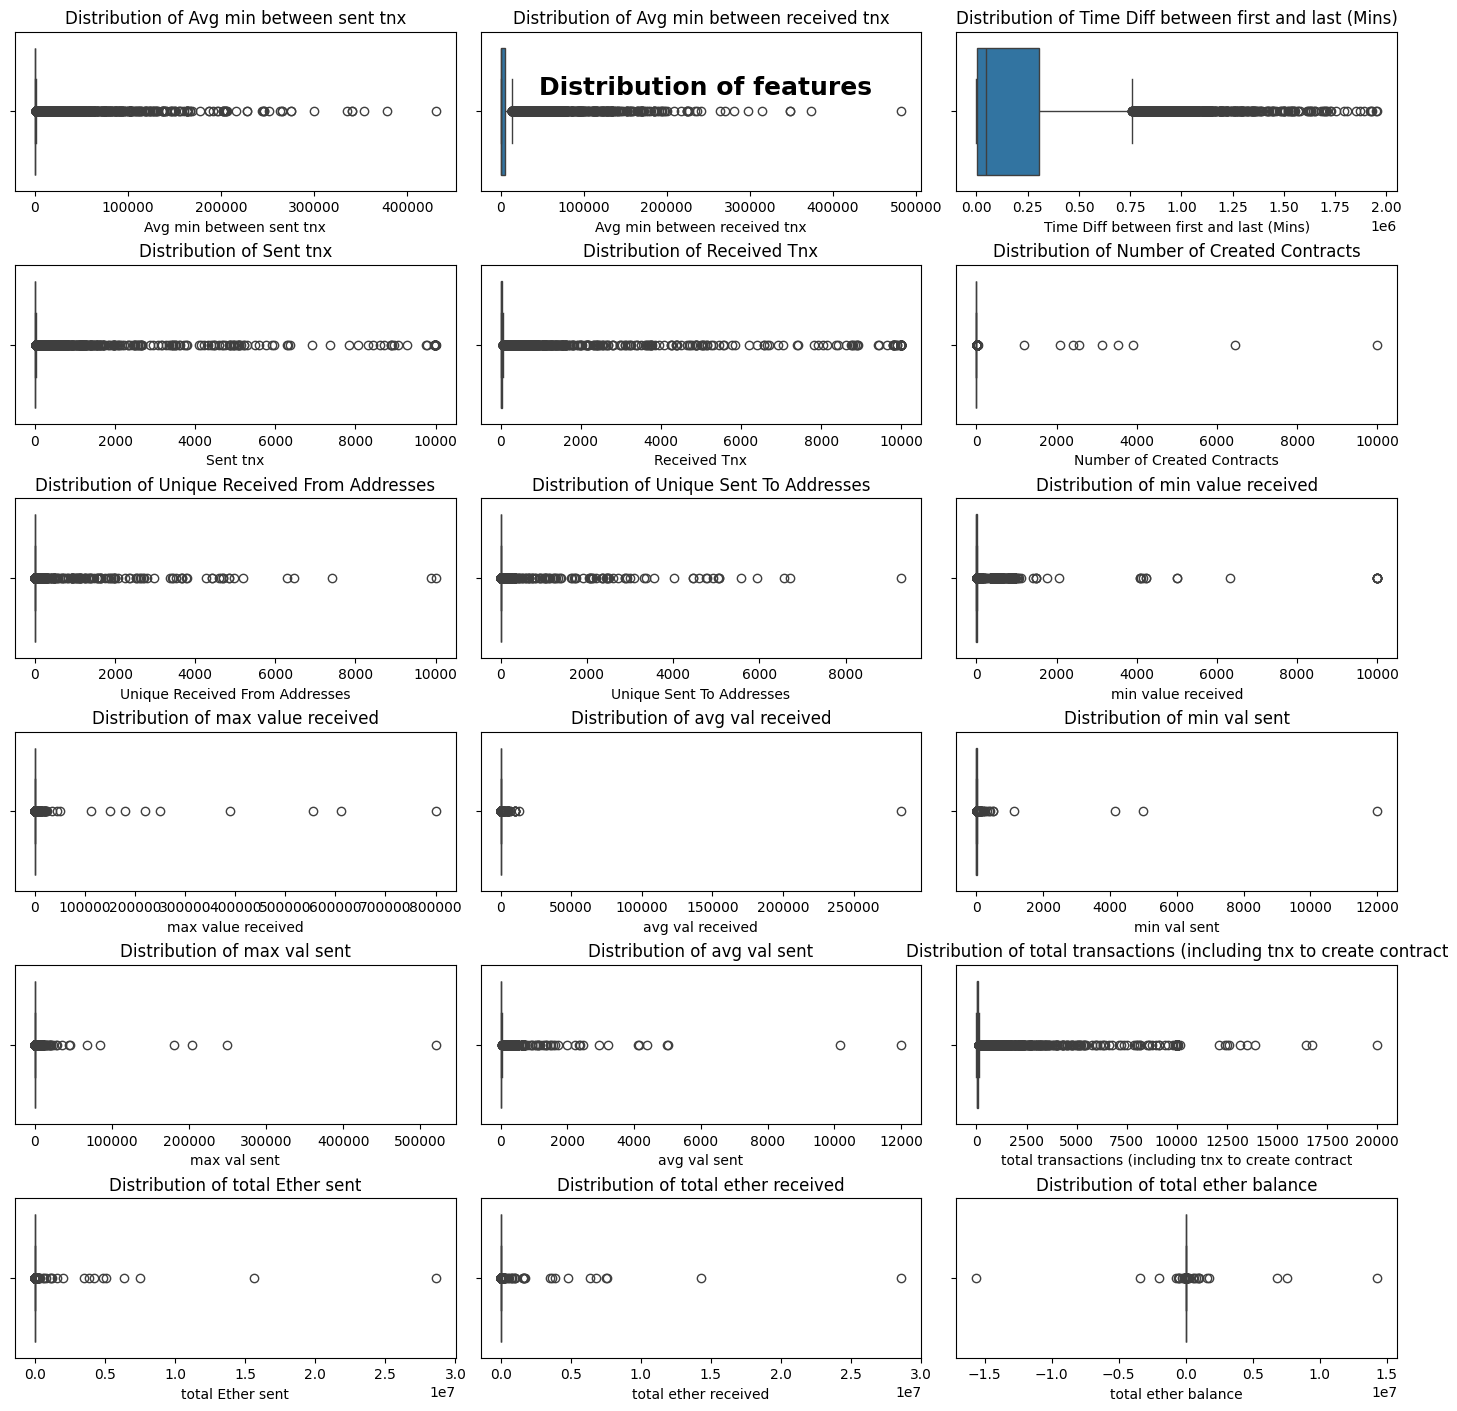

In [539]:
# Lista de columnas a graficar

columns = df.columns

# Parámetros de la cuadrícula de subgráficos
nrows = 6
ncols = 3

# Crear la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 14), constrained_layout=True)
plt.subplots_adjust(wspace=0.7, hspace=0.8)
plt.suptitle("Distribution of features", y=0.95, size=18, weight='bold')

# Iterar sobre las columnas y las posiciones en la cuadrícula
for i, col in enumerate(columns[2:]):
    row = i // ncols
    col_pos = i % ncols
    sns.boxplot(ax=axes[row, col_pos], data=df, x=col)
    axes[row, col_pos].set_title(f'Distribution of {col}')

# Mostrar el gráfico
plt.show()

C:\Users\pobla\AppData\Local\Temp\ipykernel_11096\2596160448.py:7: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



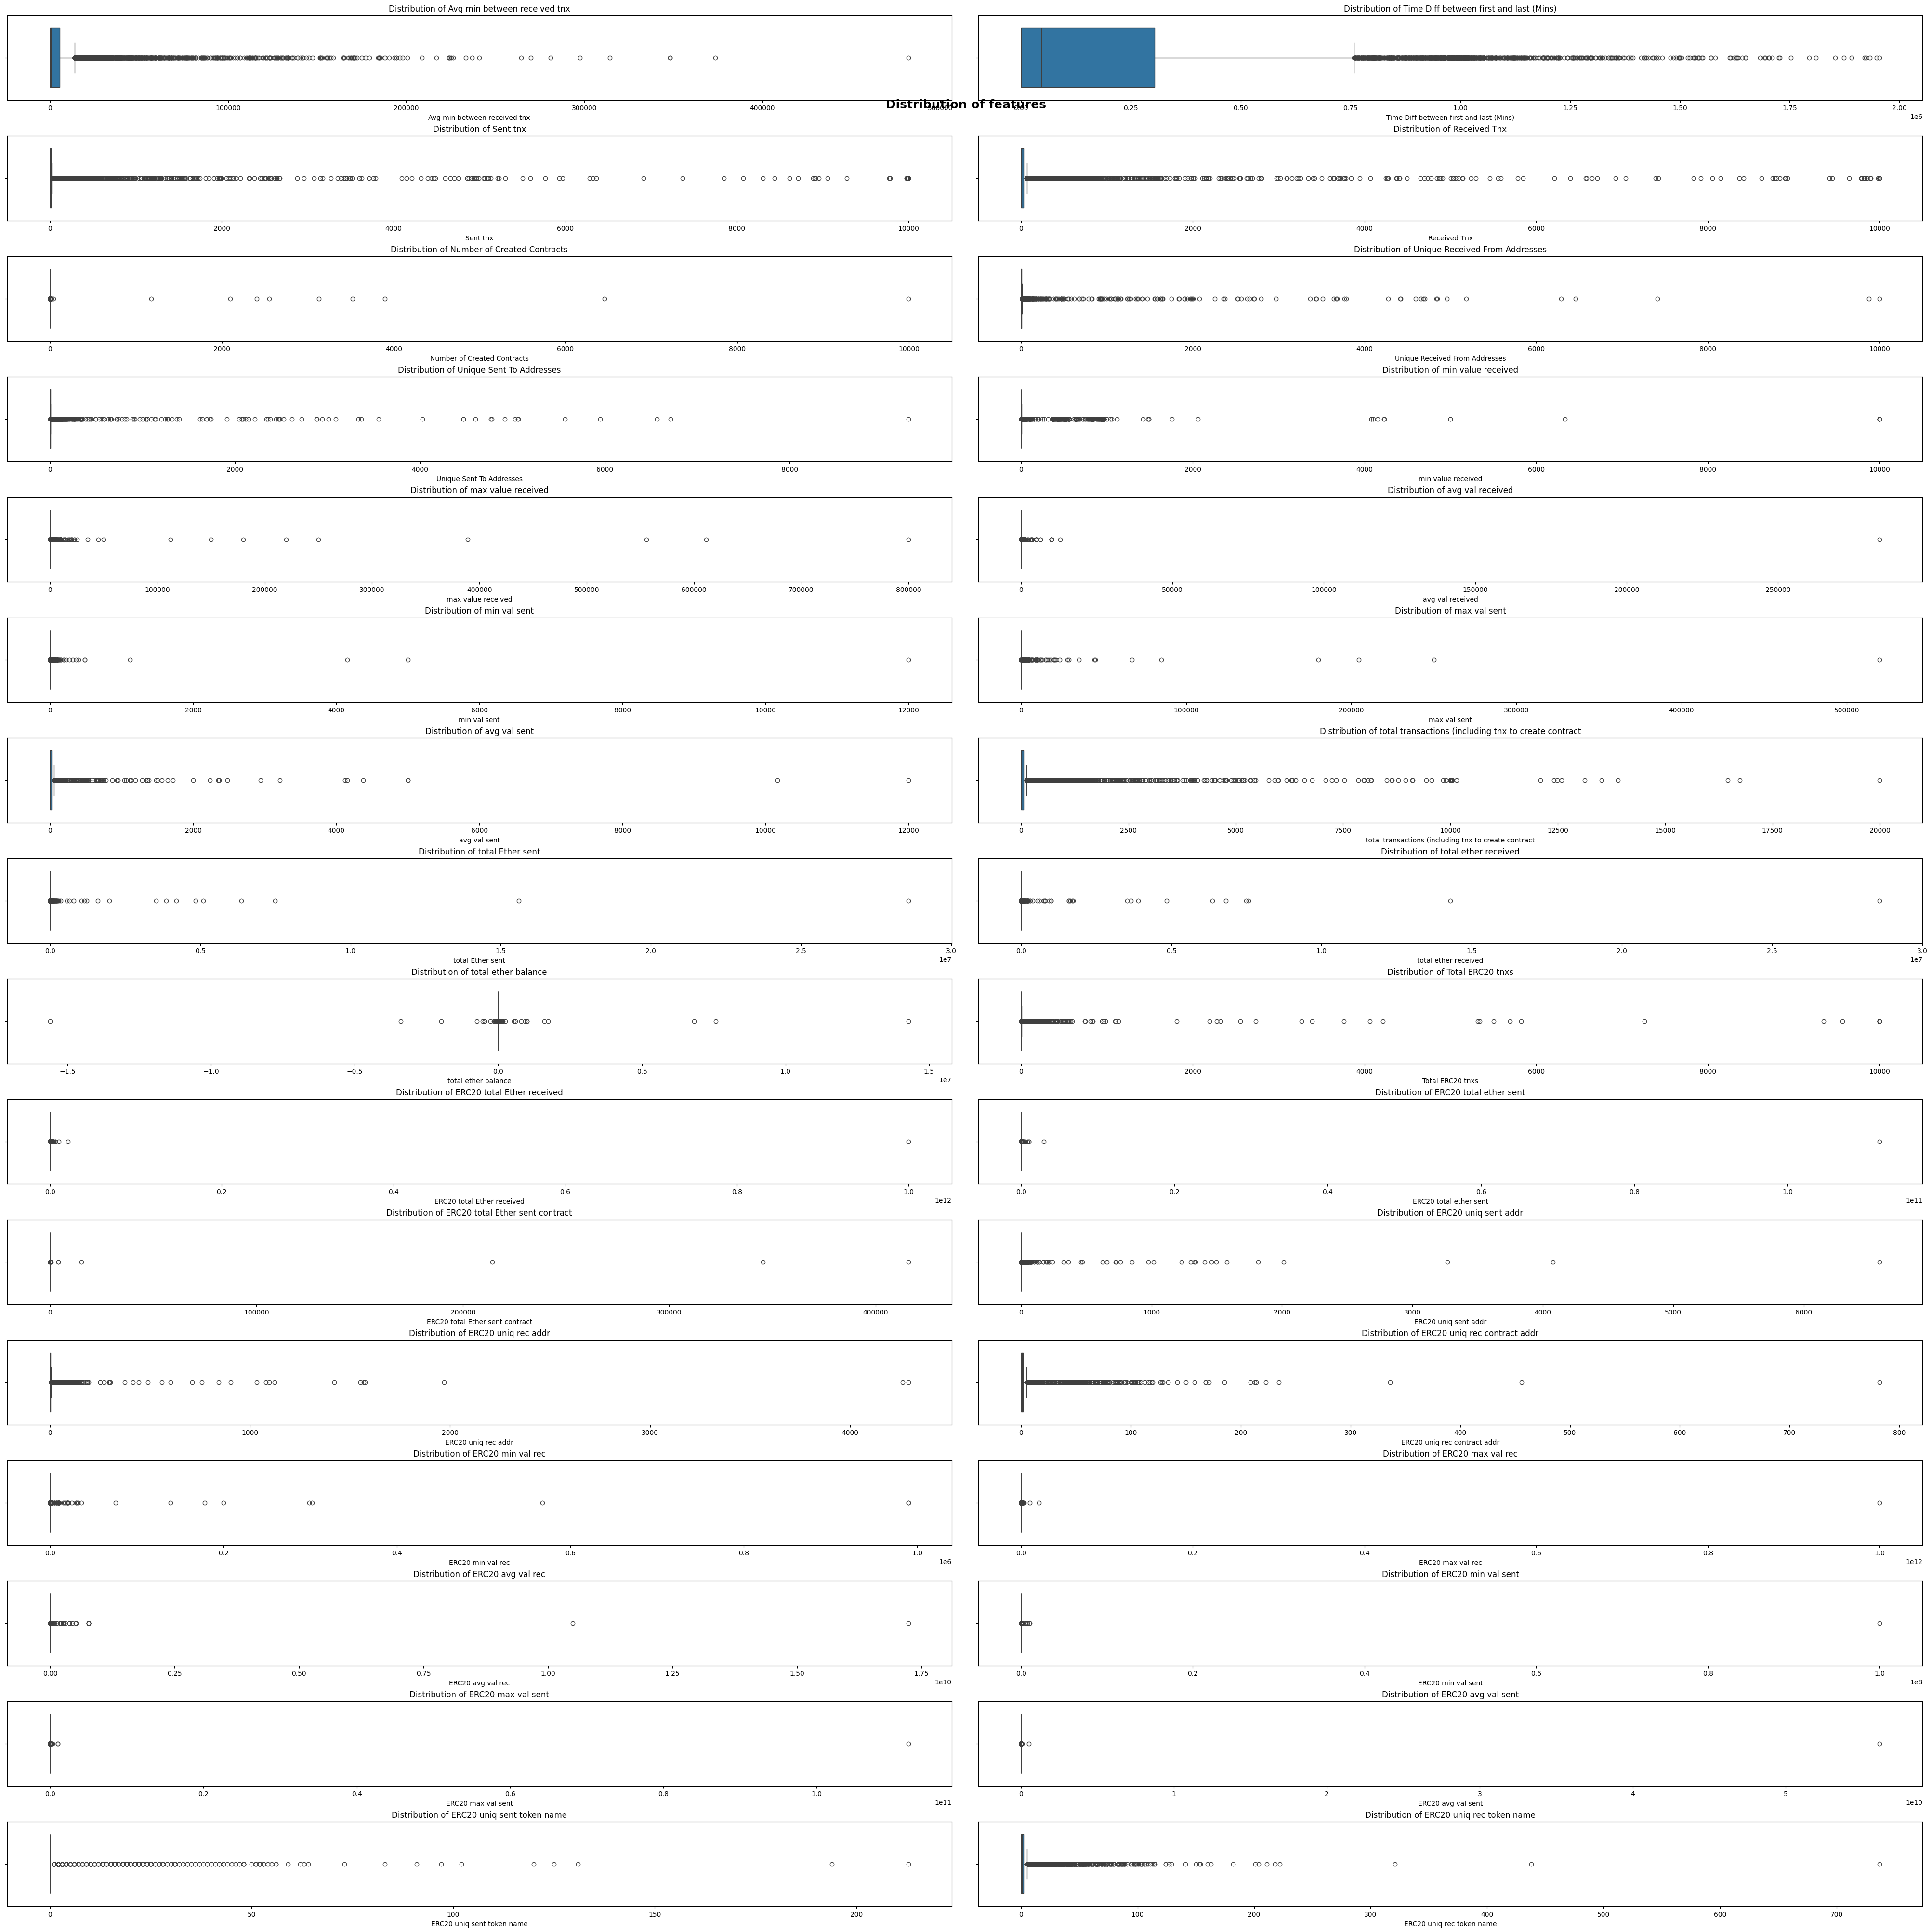

In [538]:

n_plots = len(columns) - 1  # Excluyendo la primera columna
ncols = 2
nrows = (n_plots // ncols) + (n_plots % ncols > 0)

# Crear la cuadrícula de subgráficos con un tamaño de figura más grande
fig, axes = plt.subplots(nrows, ncols, figsize=(40, 40), constrained_layout=True)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.suptitle("Distribution of features", y=0.95, size=18, weight='bold')

# Iterar sobre las columnas y las posiciones en la cuadrícula
for i, col in enumerate(columns[1:]):
    row = i // ncols
    col_pos = i % ncols
    sns.boxplot(ax=axes[row, col_pos], data=df, x=col, width=0.7)
    axes[row, col_pos].set_title(f'Distribution of {col}')

# Eliminar subgráficos vacíos si hay más subgráficos que columnas
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes.flatten()[j])

# Mostrar el gráfico
plt.show()

# ANALISIS DEL TARGET

In [ ]:
# Analizando el target:

df ['FLAG'].value_counts ()

FLAG
0    7637
1    2179
Name: count, dtype: int64

In [ ]:
flag_counts = df['FLAG'].value_counts().reset_index()
flag_counts.columns = ['FLAG', 'count']

# Crea el gráfico circular
fig = px.pie(flag_counts, values='count', names='FLAG',
             title='Target distribution of being Fraud or not',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Muestra el gráfico
fig.show()

In [ ]:
df ['FLAG'] = df['FLAG'].replace({0: 'NO', 1: 'SI'})

In [ ]:
fc.get_features_num_classification (df, 'FLAG')

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether balance',
 'Total ERC20 tnxs',
 'ERC20 total Ether received',
 'ERC20 total ether sent',
 'ERC20 total Ether sent contract',
 'ERC20 uniq sent addr',
 'ERC20 uniq rec addr',
 'ERC20 uniq rec contract addr',
 'ERC20 min val rec',
 'ERC20 max val rec',
 'ERC20 avg val rec',
 'ERC20 min val sent',
 'ERC20 max val sent',
 'ERC20 avg val sent',
 'ERC20 uniq sent token name',
 'ERC20 uniq rec token name']

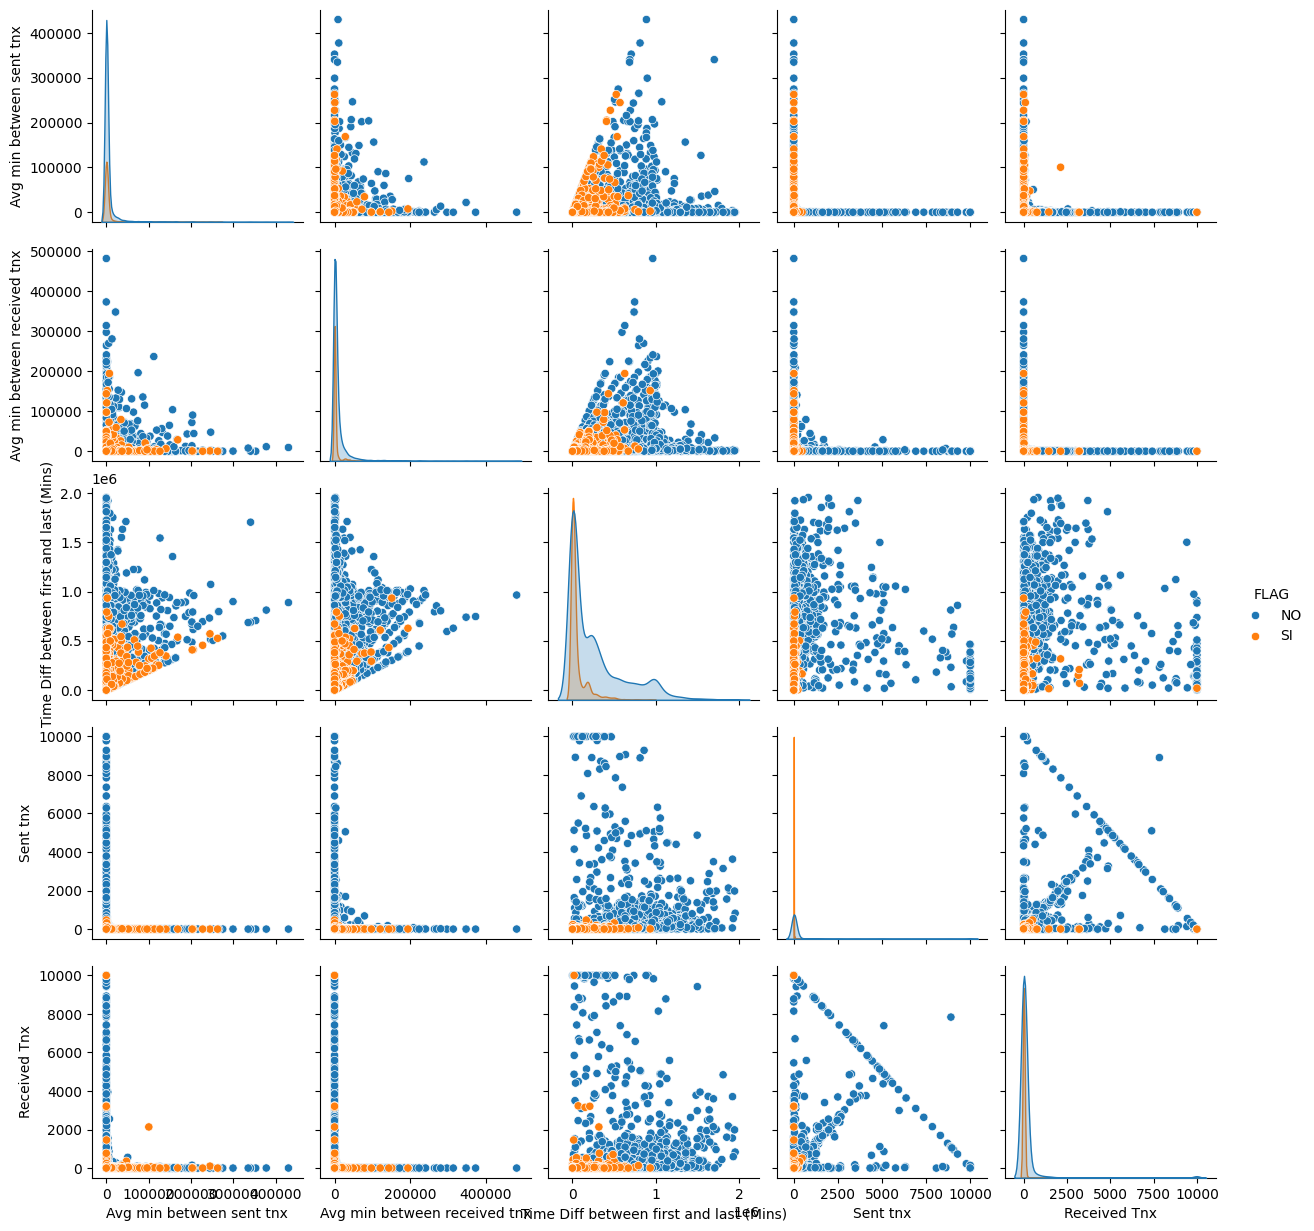

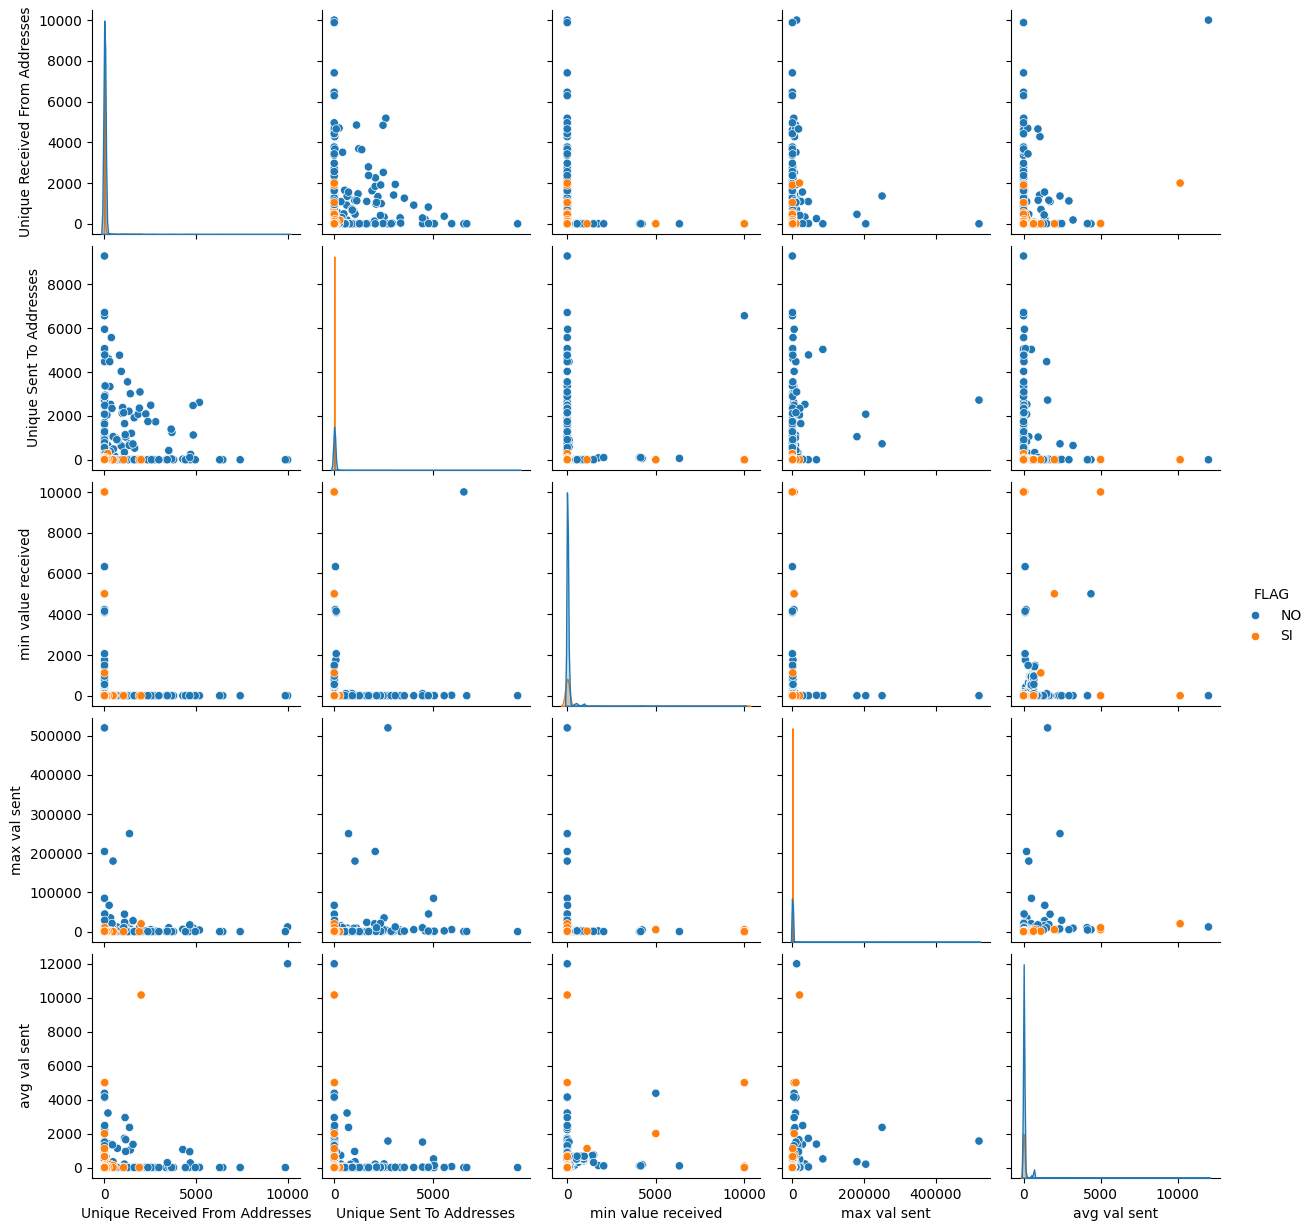

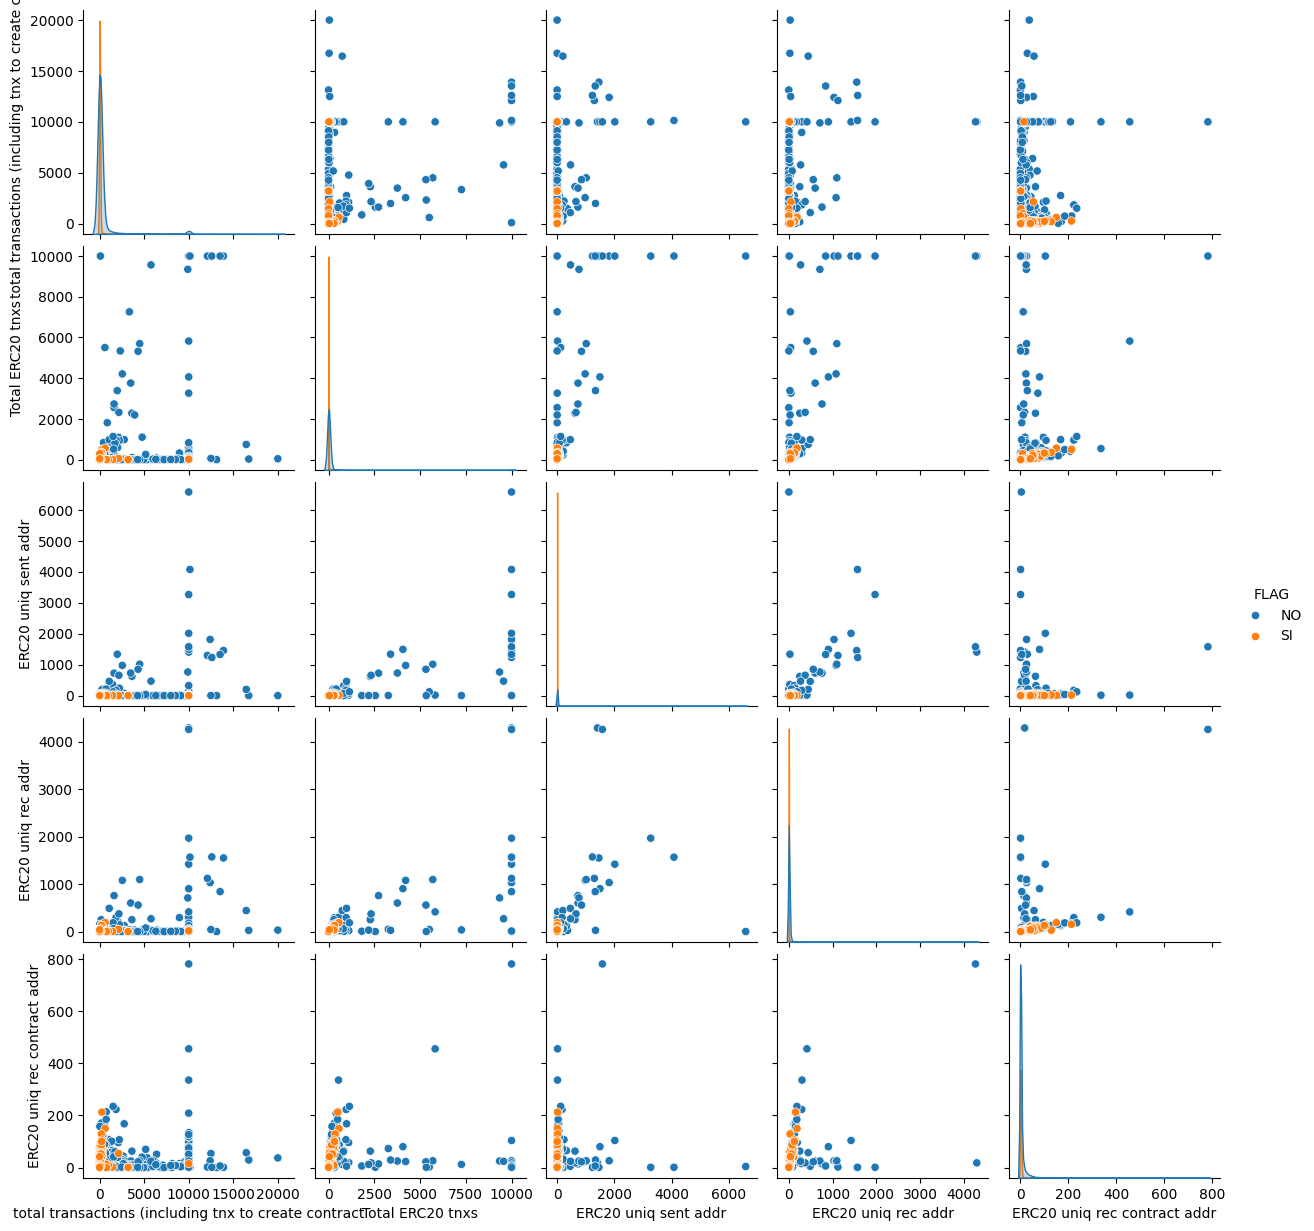

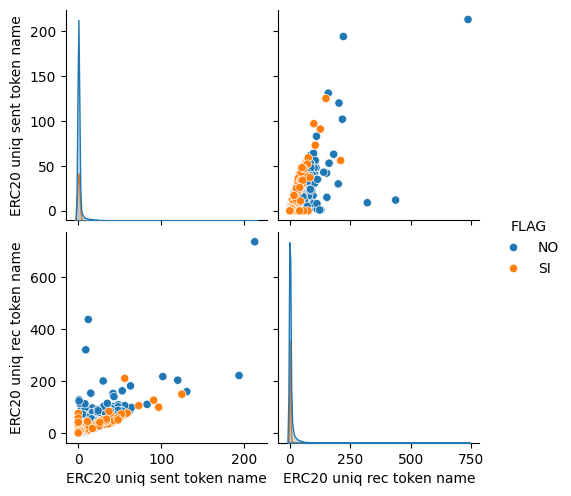

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max val sent',
 'avg val sent',
 'total transactions (including tnx to create contract',
 'Total ERC20 tnxs',
 'ERC20 uniq sent addr',
 'ERC20 uniq rec addr',
 'ERC20 uniq rec contract addr',
 'ERC20 uniq sent token name',
 'ERC20 uniq rec token name']

In [ ]:
fc.plot_features_num_classification (df, 'FLAG')

In [ ]:
df.isnull ().sum ()

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
total transactions (including tnx to cre

In [ ]:
df

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,NO,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,NO,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NO,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,NO,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,34,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,NO,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,SI,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,SI,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,SI,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,SI,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fc.plot_features_num_regression (df, target_col = 'FLAG', umbral_corr= 0.3)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
df.drop (df [categor], axis=1, inplace=True)


In [ ]:
df.fillna (df.median (), inplace= True)

TypeError: could not convert string to float: '0x00009277775ac7d0d59eaad8fee3d10ac6c805e8'

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

# SEGUIR AHORA CON LAS CORRELACIONES Y ELIMINAR LAS QUE MAS CORR TIENEN

- Evitar información rebundante
- Evitar overfitting

## Identificar y eliminar features con:

- Matriz de correlacion > 0.9

In [ ]:
df.columns = df.columns.str.strip()
corr_matrix = df.corr ().abs

corr_matrix

<bound method NDFrame.abs of                                                         FLAG  \
FLAG                                                1.000000   
Avg min between sent tnx                           -0.029754   
Avg min between received tnx                       -0.118533   
Time Diff between first and last (Mins)            -0.269354   
Sent tnx                                           -0.078006   
Received Tnx                                       -0.079316   
Number of Created Contracts                        -0.013711   
Unique Received From Addresses                     -0.031941   
Unique Sent To Addresses                           -0.045584   
min value received                                 -0.021641   
max value received                                 -0.019259   
avg val received                                   -0.011881   
min val sent                                        0.006626   
max val sent                                       -0.022437   
avg val sen

In [ ]:
df ['ERC20 min val sent contract'].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9836    0.0
9837    0.0
9838    0.0
9839    0.0
9840    0.0
Name: ERC20 min val sent contract, Length: 9841, dtype: float64>

# Columnas con values <2 los eliminamos:

-ERC20 avg time between sent tnx

-ERC20 avg time between rec tnx

-ERC20 avg time between rec 2 tnx

-ERC20 avg time between contract tnx

-ERC20 min val sent contract

-ERC20 max val sent contract 

-ERC20 avg val sent contract

In [540]:
filtered_df = df.loc[:, df.nunique() == 1]

filtered_df.columns

Index([], dtype='object')

In [ ]:
features_drop = df.columns [(df.nunique () == 1)].tolist ()

features_drop

['ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract']

In [ ]:
df = df.drop(columns=features_drop)

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

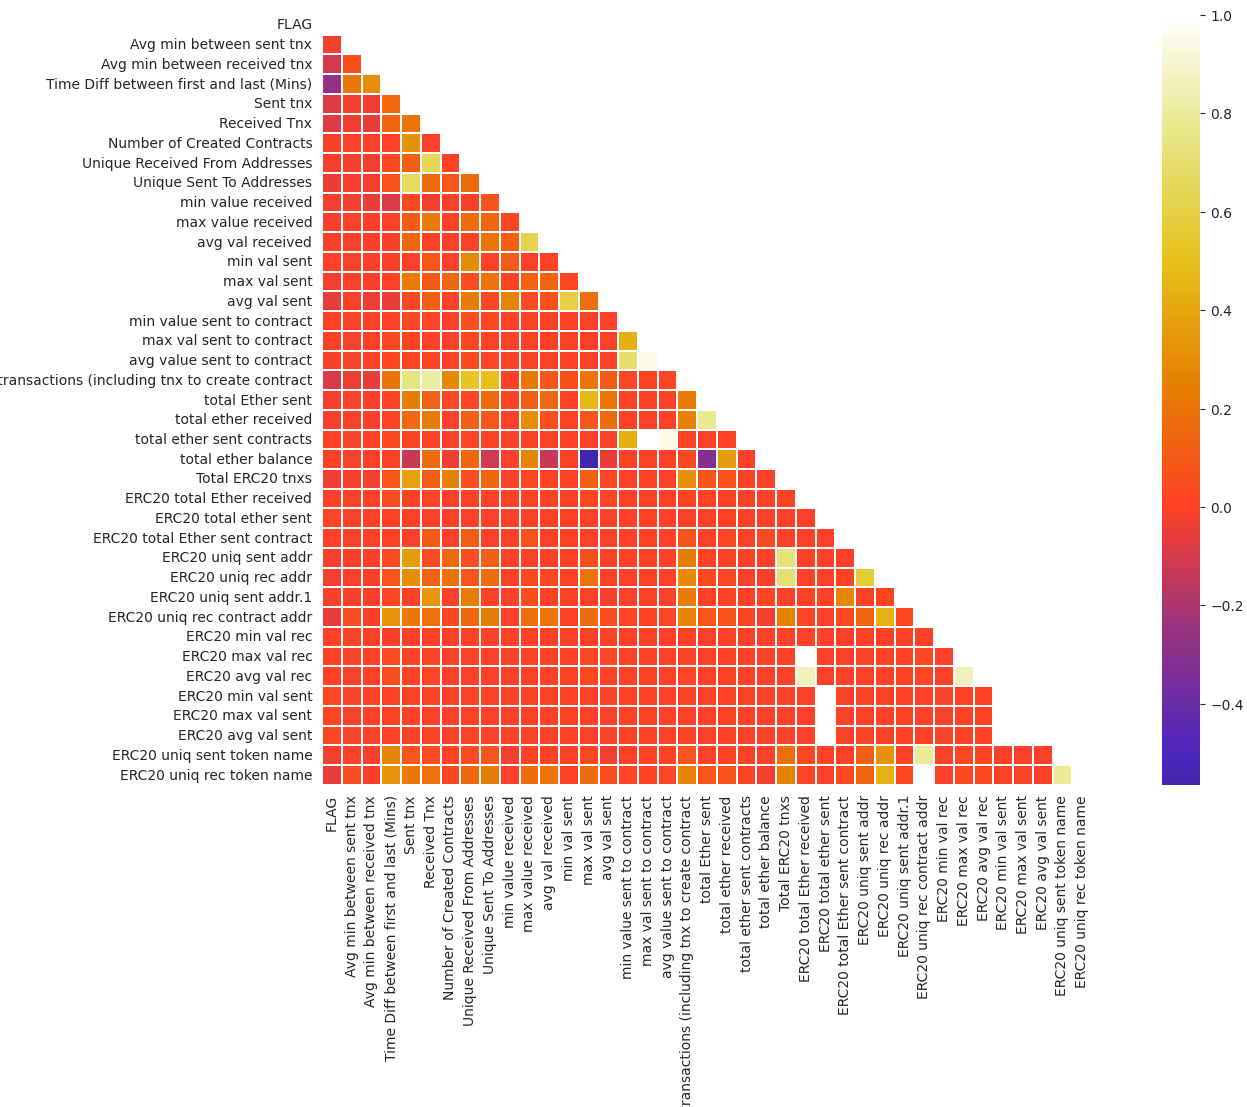

In [ ]:
corr = df.corr ()

mask = np.zeros_like (corr)
mask [np.triu_indices_from (mask)] = True


with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.heatmap(corr, mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)


In [ ]:

# Crear una lista para almacenar las columnas con alta correlación
high_corr_columns = []

# Iterar sobre la matriz de correlación para encontrar correlaciones mayores a 0.9
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] > 0.9:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            high_corr_columns.append(colname_i)
            high_corr_columns.append(colname_j)


# Mostrar las columnas con alta correlación
print("Columnas con correlación mayor a 0.9:")
print(len (high_corr_columns))

Columnas con correlación mayor a 0.9:
0


In [542]:
df_sin =  df.drop(columns=high_corr_columns)

In [543]:
corr = df_sin.corr ()

mask = np.zeros_like (corr)
mask [np.triu_indices_from (mask)] = True


with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.heatmap(corr, mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

ValueError: could not convert string to float: '0x00009277775ac7d0d59eaad8fee3d10ac6c805e8'